**EXERCISE 10**

Load in Olivetti dataset, split it into train/val/test sets with stratified sampling, cluster using K-means and visualize

In [58]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn.cluster import KMeans
from sklearn.model_selection import StratifiedShuffleSplit as SSS
import random

In [4]:
olivetti = fetch_olivetti_faces(shuffle=True)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\TSB\scikit_learn_data


In [6]:
olivetti.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [51]:
X = olivetti['data']
images = olivetti['images']
y = olivetti['target']

images[0].shape

(64, 64)

In [19]:
# Initial split of train/test

sss = SSS(test_size = 0.1)
for train_idx, test_idx in sss.split(X, y):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

In [23]:
# Further split train set into train/val

sss = SSS(test_size=40)
for train_idx, val_idx in sss.split(X_train, y_train):
    X_train, X_val = X[train_idx], X[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]

In [43]:
# Generate a bunch of k-means models to check silhouette_score on

k_means_models = [KMeans(n_clusters=k).fit(X_train) for k in range(1,15)]
silhouette_scores = [silhouette_score(X_train, model.labels_) for model in k_means_models[1:]]

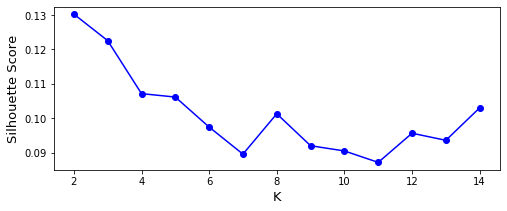

In [44]:
plt.figure(figsize=(8,3))
plt.plot(range(2,15), silhouette_scores, 'bo-')
plt.xlabel('K', fontsize=13)
plt.ylabel('Silhouette Score', fontsize=13)
plt.show()

Here we can see peaks at k=10 and k=13 with the absolute maximum being at 2 and the end of the graph trending upwards.


Thanks to the sklearn documentation found at:
    https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

For n_clusters = 4 The average silhouette_score is : 0.111416936
For n_clusters = 8 The average silhouette_score is : 0.09379276
For n_clusters = 9 The average silhouette_score is : 0.08636401
For n_clusters = 12 The average silhouette_score is : 0.08856778


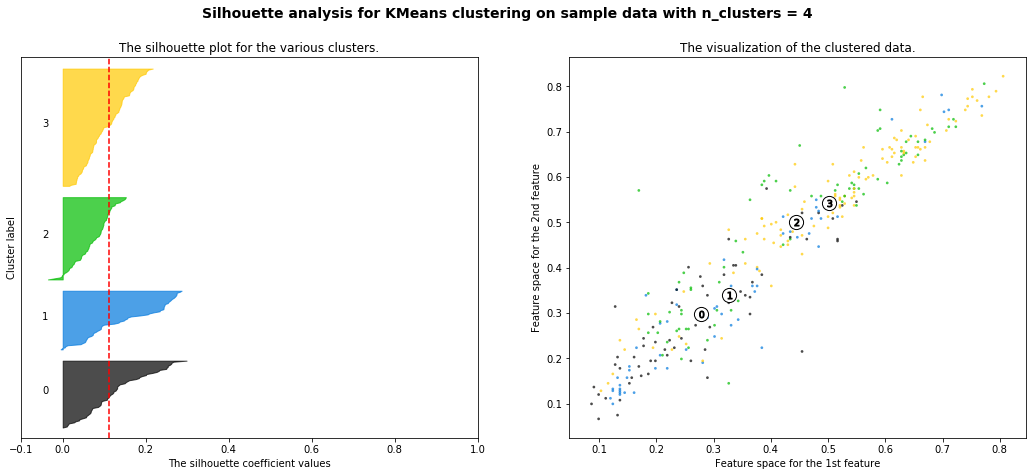

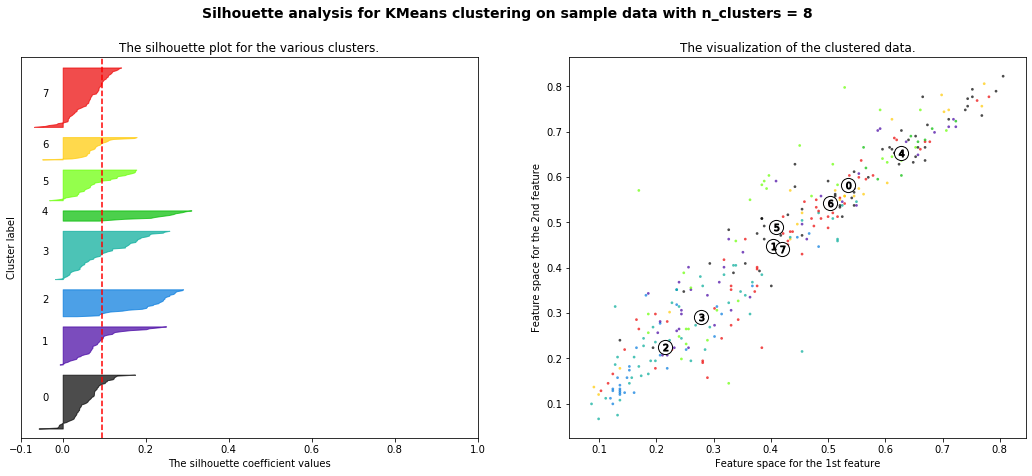

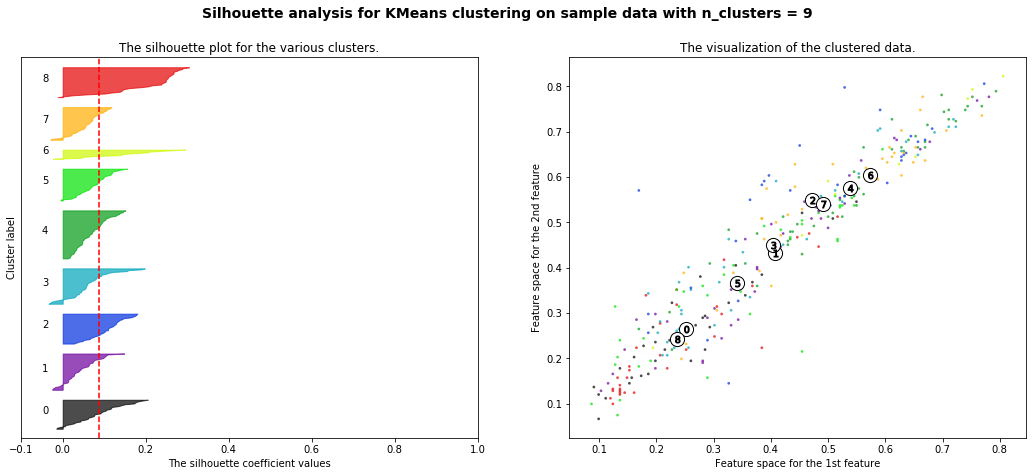

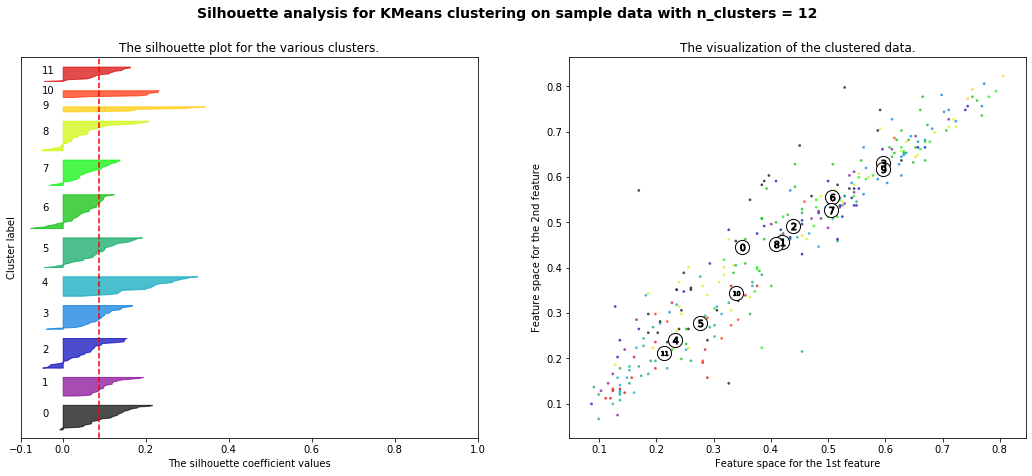

In [46]:
"""
Thanks to the sklearn documentation found at:
    https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
"""

from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm

print(__doc__)

range_n_clusters = [4, 8, 9, 12]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_train) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(X_train)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_train, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_train, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X_train[:, 0], X_train[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')


None of the graphs appear to have clusters below the threshold. However when n_clusters = 9 appears to be the most uniform and so we'll go with this for our n_clusters.

In [47]:
kmeans = KMeans(n_clusters=9)
kmeans.fit(X_train)
y_train_pred = kmeans.predict(X_train)

In [49]:
cluster1 = X_train[y_train_pred==1]
cluster4 = X_train[y_train_pred==4]

In [56]:
print(cluster1.shape[0])

45


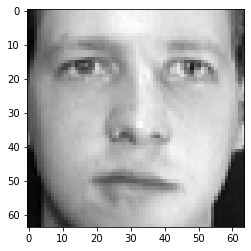

In [73]:
# Display images falling into cluster 1
# Note that most of these images appear to be men and a few have glasses

plt.imshow(cluster1[random.randint(0,cluster1.shape[0] - 1)].reshape(64,64), cmap='gray')

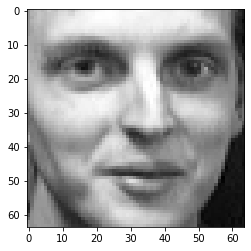

In [81]:
# Display images falling into cluster 4
# Note that many of these images have people with smaller, rounded chins

plt.imshow(cluster4[random.randint(0,cluster4.shape[0] - 1)].reshape(64,64), cmap='gray')

**EXERCISE 11**

Train a classifier on the training set and evaluate on val set. Then reduce dimensionality using K-means and train a new classifier. search for best number of clusters. See how it performs and compare.

In [83]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [90]:
svc.score(X_train, y_train)

0.996875

In [92]:
svc.score(X_val, y_val)

0.975

In [101]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('kmeans', KMeans(n_clusters=50)),
    ('svc', SVC())
])

pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('kmeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=50, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=None,
                        tol=0.0001, verbose=0)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [102]:
# Note that this dimensionality reduction does terribly

pipeline.score(X_val, y_val)

0.475

In [107]:
from sklearn.model_selection import GridSearchCV

param_grid = dict(kmeans__n_clusters=range(2,100))
grid_clf = GridSearchCV(pipeline, param_grid, cv=4, verbose=2, n_jobs=-1)
grid_clf.fit(X_train, y_train)

Fitting 4 folds for each of 98 candidates, totalling 392 fits


c:\users\tsb\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 16.0min
[Parallel(n_jobs=-1)]: Done 392 out of 392 | elapsed: 19.6min finished


GridSearchCV(cv=4, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('kmeans',
                                        KMeans(algorithm='auto', copy_x=True,
                                               init='k-means++', max_iter=300,
                                               n_clusters=50, n_init=10,
                                               n_jobs=None,
                                               precompute_distances='auto',
                                               random_state=None, tol=0.0001,
                                               verbose=0)),
                                       ('svc',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                                            decision_function_shape='ovr',
                                        

In [108]:
grid_clf.best_params_

{'kmeans__n_clusters': 68}

In [110]:
grid_clf.score(X_train, y_train)

0.80625

In [109]:
grid_clf.score(X_val, y_val)

0.5

**EXERCISE 12**

Train a Gaussian mixture on Olivetti dataset. Speed up with PCA(.99 variance). Generate some new faces using sample() method and visualize with PCA inverse_transform() method. Mess with images and see if the model can handle it. 

In [113]:
from sklearn.decomposition import PCA
from sklearn.mixture import BayesianGaussianMixture as BGM

pipeline = Pipeline([
    ('pca', PCA(n_components=0.99)),
    ('bgm', BGM(n_components=50, n_init=10))
])

pipeline.fit(X_train)

Pipeline(memory=None,
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=0.99,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('bgm',
                 BayesianGaussianMixture(covariance_prior=None,
                                         covariance_type='full',
                                         degrees_of_freedom_prior=None,
                                         init_params='kmeans', max_iter=100,
                                         mean_precision_prior=None,
                                         mean_prior=None, n_components=50,
                                         n_init=10, random_state=None,
                                         reg_covar=1e-06, tol=0.001, verbose=0,
                                         verbose_interval=10, warm_start=False,
                                         weight_concentration_prior=None,
                         

In [127]:
# Generate new samples from our gaussian distributions
X_new, y_new = pipeline['bgm'].sample(6)

# Reverse our PCA dimensional reduction
X_new = pipeline['pca'].inverse_transform(X_new)

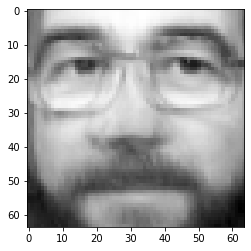

In [135]:
# Display random recreated image
plt.imshow(X_new[random.randint(0, X_new.shape[0]-1)].reshape(64,64), cmap='gray')